# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [13]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [15]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [16]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [17]:
# Extract all rows of data
table_column_name = []
table_column_value = []
column_names = []
mars_w_table = soup.select_one('table', class_='table')
data = mars_w_table.find_all('td')
table_column_name = mars_w_table.find_all('th')
table_column_name
for i in table_column_name:
    column_names.append(i.string)
for k in data:
    table_column_value.append(k.string)
table_column_value   
column_names

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [18]:
# Create an empty list
id_num = []
t_date =[]
sols = []
solar_lng = []
month_mars = []
min_t = []
p = []
new_list = []
length_tableval= len(table_column_value) 
# Loop through the scraped data to create a list of rows
for m in range(0, len(table_column_value), 7):
    new_list.append(table_column_value[m:m+7])
print(new_list)
   

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [19]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
import pandas as pd
Mars_temp_data_df = pd.DataFrame(new_list, columns=column_names)


In [35]:
# Confirm DataFrame was created successfully
Mars_temp_data_df.head(30)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [22]:
# Examine data type of each column
Mars_temp_data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [111]:
# Change data types for data analysis
import datetime as datetime
Mars_temp_data_df['id'] =pd.to_numeric(Mars_temp_data_df['id'])
Mars_temp_data_df['terrestrial_date'] = pd.to_datetime(Mars_temp_data_df['terrestrial_date'], errors ='coerce')
Mars_temp_data_df['sol']= pd.to_numeric(Mars_temp_data_df['sol'], errors ='coerce')

Mars_temp_data_df['ls'] = pd.to_numeric(Mars_temp_data_df['ls'], errors ='coerce')
Mars_temp_data_df['month'] = pd.to_numeric(Mars_temp_data_df['month'], errors ='coerce')
Mars_temp_data_df['min_temp']= pd.to_numeric(Mars_temp_data_df['min_temp'].convert_dtypes(), errors ='raise')
Mars_temp_data_df['pressure'] = pd.to_numeric(Mars_temp_data_df['pressure'].convert_dtypes(), errors ='raise')
Mars_temp_data_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   Float64
pressure                   Float64
dtype: object

In [79]:
# Confirm type changes were successful by examining data types again
Mars_temp_data_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   Float64
pressure                   Float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [84]:
# 1. How many months are there on Mars?
Mars_months_count=Mars_temp_data_df.groupby('month')['id'].count()
Mars_months_count.sort_values(ascending = False)

month
4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: id, dtype: int64

In [85]:
# 2. How many Martian days' worth of data are there?
num_martian_days=len(Mars_temp_data_df['sol'])
num_martian_days

1867

In [97]:
# 3. What is the average low temperature by month?
Avg_min_temp = Mars_temp_data_df.groupby('month')['min_temp'].mean()
avg_min_temp_df= pd.DataFrame(Avg_min_temp.sort_values(ascending = True))
avg_min_temp_df
Avg_min_temp

month
1     -77.16092
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6     -75.29932
7     -72.28169
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: Float64

<Axes: xlabel='month', ylabel='minimum temperature per month'>

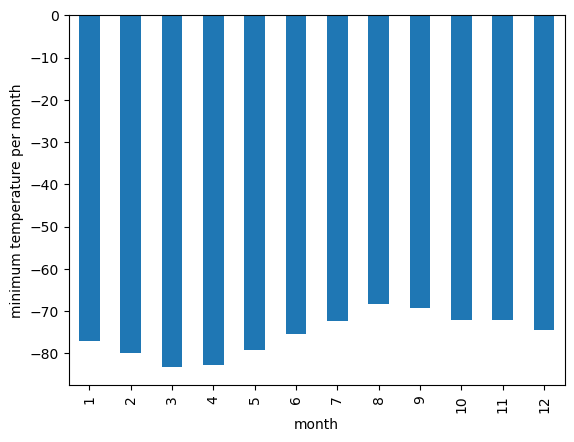

In [99]:
# Plot the average temperature by month
Avg_min_temp.plot.bar( ylabel="minimum temperature per month")


<Axes: xlabel='month', ylabel='Temperature in Celsius'>

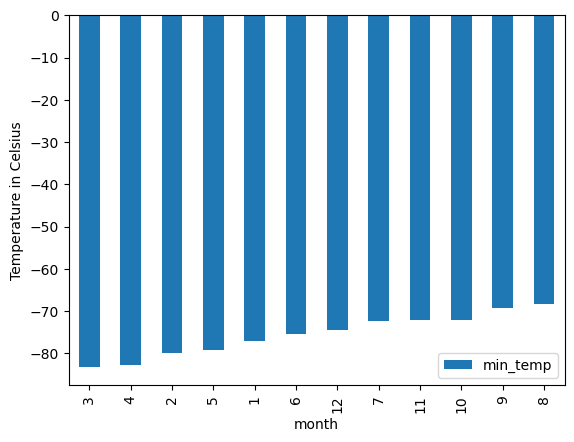

In [100]:
# Identify the coldest and hottest months in Curiosity's location
avg_min_temp_df.plot.bar(xlabel = 'month', ylabel = 'Temperature in Celsius')

In [89]:
# 4. Average pressure by Martian month
Avg_pressure_month = Mars_temp_data_df.groupby('month')['pressure'].mean()
Avg_pressure_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9      913.30597
10      887.3125
11    857.014493
12    842.156627
Name: pressure, dtype: Float64

<Axes: xlabel='month', ylabel='Atmospheric Pressure'>

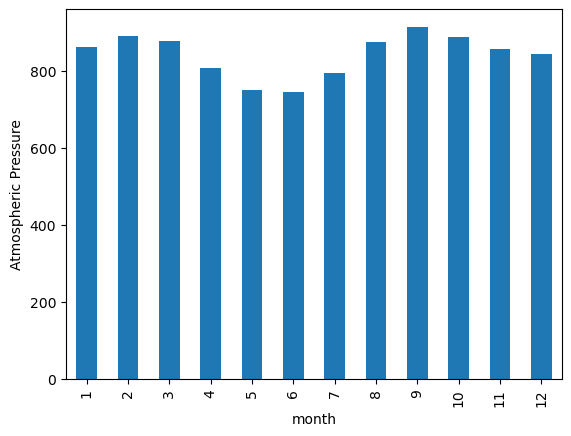

In [101]:
# Plot the average pressure by month
Avg_pressure_month.plot.bar(xlabel='month', ylabel='Atmospheric Pressure')

In [173]:
import numpy as np
import matplotlib.pyplot as plt
Mars_temp_data_df['terrestrial_year']=(Mars_temp_data_df['terrestrial_date']).dt.year
Mars_temp_data_df['terrestrial_day']=(Mars_temp_data_df['terrestrial_date']).dt.day
#for each martian month, the number of sol = martian days recorded
num_sols_month=Mars_temp_data_df.groupby('month')['sol'].nunique()
#number of days in 1year in mars 
marsdays_inamarsyear=num_sols_month.agg('sum')
marsdays_inamarsyear
earthyear_marsmonths= Mars_temp_data_df.groupby('terrestrial_year')['month'].nunique()
earthyear_marsdays= Mars_temp_data_df.groupby('terrestrial_year')['sol'].nunique()
earthyear_marsdays.agg('sum')
earthyear_marsdays
#Mars_temp_data_df.tail(10)
#there are 42 months in a year in mars, 1867 days in 1year in mars.
print(f"number of days in 1year of mars:\n{marsdays_inamarsyear}")# calculated by counting 12 martian months
print(f"number of months in mars with respect to earth years:\n{earthyear_marsdays}")
print(f"number of martian months per earth year: \n{earthyear_marsmonths}")

number of days in 1year of mars:
1867
number of months in mars with respect to earth years:
terrestrial_year
2012    130
2013    290
2014    355
2015    340
2016    345
2017    351
2018     56
Name: sol, dtype: int64
number of martian months per earth year: 
terrestrial_year
2012    3
2013    8
2014    7
2015    7
2016    8
2017    7
2018    2
Name: month, dtype: int64


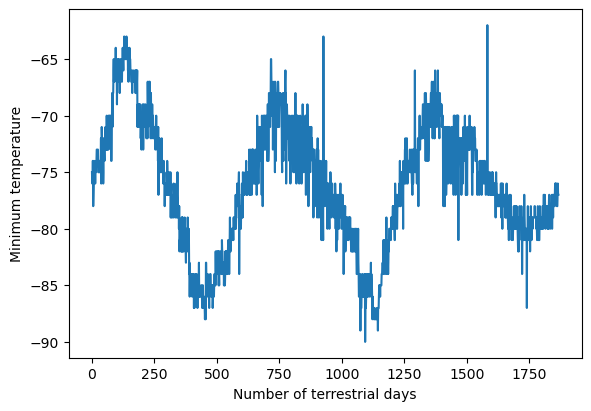

In [164]:
# 5. How many terrestrial (earth) days are there in a Martian year?
xaxis = np.arange(0, 1867)
yaxis = Mars_temp_data_df['min_temp']
fig, ax = plt.subplots(figsize = (5.8, 4), layout = 'constrained')
graphsx = ax.plot(xaxis, yaxis)
ax.set_xlabel('Number of terrestrial days')
ax.set_ylabel('Minimum temperature')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [166]:
# Write the data to a CSV
Mars_temp_data_df.to_csv('Mars_temp_data.csv', sep=',', float_format=str, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure', 'terrestrial_year','terrestrial_day'],mode= 'w')

In [167]:
browser.quit()